In [181]:
import pandas as pd
import numpy as np

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
%matplotlib inline

In [184]:
orig_data = pd.read_csv('Classified Data', index_col=0) # 0 is the number of the first column that we use for indexing otherwise
                                                        #we get an unnamed column!

In [185]:
orig_data.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [186]:
df_ = orig_data.drop('TARGET CLASS', axis=1)

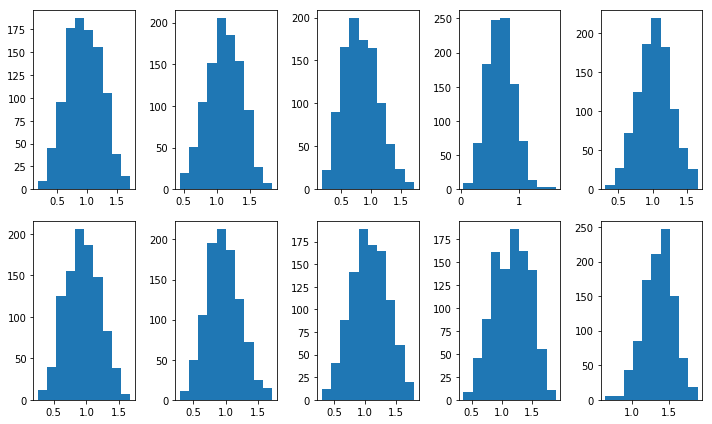

In [187]:
fig, axes= plt.subplots(2,5, figsize=(10,6)) #a good way to plot the histogram of all the columns
p = axes.ravel()
for i, sub_plot in enumerate(p):
    sub_plot.hist(df_[df_.columns[i]])
plt.tight_layout()

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()

In [190]:
scaler.fit(df_)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
scaled_features = scaler.transform(df_)

In [192]:
df = pd.DataFrame(scaled_features, columns=df_.columns)

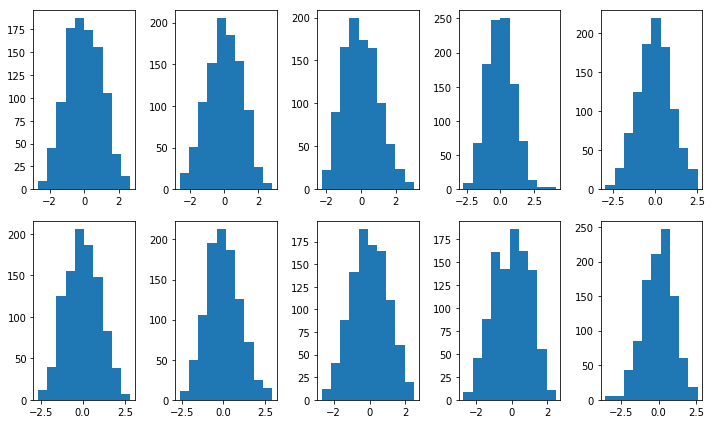

In [193]:
fig, axes= plt.subplots(2,5, figsize=(10,6)) #a good way to plot the histogram of all the columns
p = axes.ravel()
for i, sub_plot in enumerate(p):
    sub_plot.hist(df[df.columns[i]])
plt.tight_layout()

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X = df
y = orig_data['TARGET CLASS']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier(1)

In [199]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [200]:
preds = knn.predict(X_test)

In [201]:
from sklearn.metrics import classification_report, confusion_matrix

In [202]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[150   9]
 [ 14 127]]


             precision    recall  f1-score   support

          0       0.91      0.94      0.93       159
          1       0.93      0.90      0.92       141

avg / total       0.92      0.92      0.92       300



even with k=1 the algorithm works very well. however, if we want to tune k, we can apply elbow method. We can simply calculate
all the metrics from confustion matrix but just for the matter of practicing ETL, lets extract useful data from the report

In [203]:
def my_classification_report(a): #we are interested in precision and accuracy
    formated_report = ' '
    for char in a.replace('\n', ' '):
        if char == ' ' and formated_report[-1] == ' ':
            pass
        else:
            formated_report += char
    a = formated_report.strip(' ').split(' ')
    b = np.array([[float(a[5]), float(a[10]), float(a[-2])]])
    df = pd.DataFrame(data=b, columns=['Precision-0', 'Precision-1', 'Accuracy'])  
    return df
    

In [204]:
my_classification_report(classification_report(y_test, preds))


,Precision-0,Precision-1,Accuracy
0,0.91,0.93,0.92


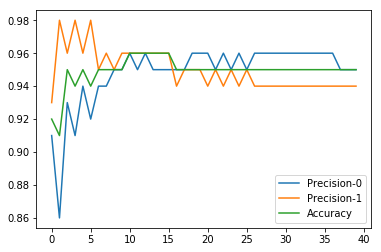

In [213]:
df_accuracy = pd.DataFrame()
for k in range(1,41):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    c = my_classification_report(classification_report(y_test, preds))
    df_accuracy = df_accuracy.append(c, ignore_index=True) 
df_accuracy.plot()

based on the above plot k=10 returns a good model

In [214]:
df_accuracy.loc[10]

Precision-0    0.96
Precision-1    0.96
Accuracy       0.96
Name: 10, dtype: float64